<a href="https://colab.research.google.com/github/zhulkhoirrifat/RentalBikeAnalysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Istia Budi
- **Email:**  istiabudi@gmail.com
- **ID Dicoding:** istiabudi73

## Menentukan Pertanyaan Bisnis

- Bagaimana cuaca mempengaruhi rental sepeda?
- Bagaiamana musim mempengaruhi rental sepeda?
- Apakah jumlah peminjam sepeda meningkat dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
rental_df = pd.read_csv('day.csv')
rental_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset yang digunakan pada proyek ini adalah dataset bike sharing yang dapat diakses melalui kaggle. Bike sharing datasets memiliki 2 files yaitu day.csv dan hour.csv. Pada proyek kali ini peneliti hanya menggunakan file day.csv. Dataset dapat diunduh melalui: [Bike Sharing Datasets](https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset)
- Dataset ini memuat data peminjam sepeda dari rentang 01 Januari 2011 hingga 31 Desember 2012.
- Dataset memiliki 731 baris dan 16 kolom.

### Assessing Data

In [3]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Cek missing value pada dataset

In [4]:
rental_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


Cek duplikasi pada dataset

In [5]:

rental_df.duplicated().sum()

0

Cek parameter statistik

In [6]:
rental_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Tidak ada missing value pada dataset
- Tidak ada duplikasi pada dataset
- Tidak ada yang aneh pada parameter statistik

### Cleaning Data

Mengubah tipe data ```dteday``` menjadi datetime



In [7]:
datetime_columns = ['dteday']

for column in datetime_columns:
  rental_df[column] = pd.to_datetime(rental_df[column])

Mengubah value ```season``` dari 1-4 menjadi Spring, Summer, Fall, Winter

In [8]:
season_mapping = {'1' : 'Spring', '2' : 'Summer', '3' : 'Fall', '4' : 'Winter'}

rental_df['season'] = rental_df['season'].astype(str)
rental_df['season'] = rental_df['season'].map(season_mapping)

Mengubah value ```weathersit``` dari 1-4 menjadi cuaca cerah dan berawan ringan, berkabut dan berawan, hujan dan salju ringan, cuaca ekstrim.

In [9]:
weather_mapping = {'1' : 'Cerah dan Berawan Ringan', '2' : 'Berkabut dan Berawan', '3' : 'Hujan dan Salju Ringan', '4' : 'Cuaca Ekstrim'}

rental_df['weathersit'] = rental_df['weathersit'].astype(str)
rental_df['weathersit'] = rental_df['weathersit'].map(weather_mapping)

Cek hasil cleaning

In [10]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Mengubah tipe data ```dteday``` menjadi datetime
- Mengubah value ```season``` dari 1-4 menjadi Spring, Summer, Fall, Winter
- Mengubah value ```weathersit``` dari 1-4 menjadi cuaca cerah dan berawan ringan, berkabut dan berawan, hujan dan salju ringan, cuaca ekstrim.

## Exploratory Data Analysis (EDA)

### Explorasi Data day.csv

Statistik deskriptif

In [11]:
rental_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,NaN,NaN,NaN,NaN,Cerah dan Berawan Ringan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,NaN,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,1.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,1.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Cek musim pemakaian sepeda terbanyak

In [12]:
rental_df.groupby(by='season').instant.nunique().sort_values(ascending=False)

,instant
season,
Fall,188
Summer,184
Spring,181
Winter,178


Cek cuaca pemakaian sepeda terbanyak

In [13]:
rental_df.groupby(by='weathersit').instant.nunique().sort_values(ascending=False)

,instant
weathersit,
Cerah dan Berawan Ringan,463
Berkabut dan Berawan,247
Hujan dan Salju Ringan,21


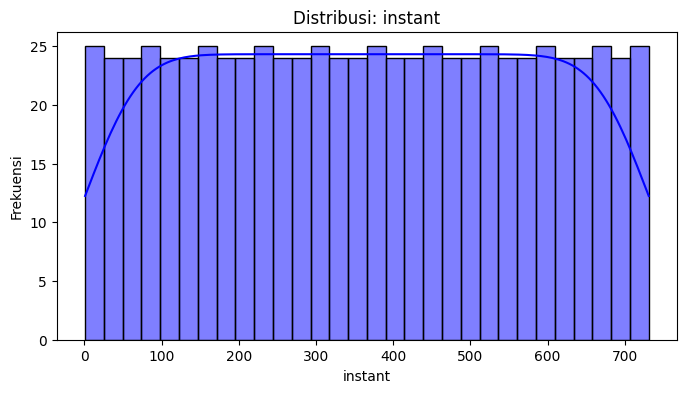

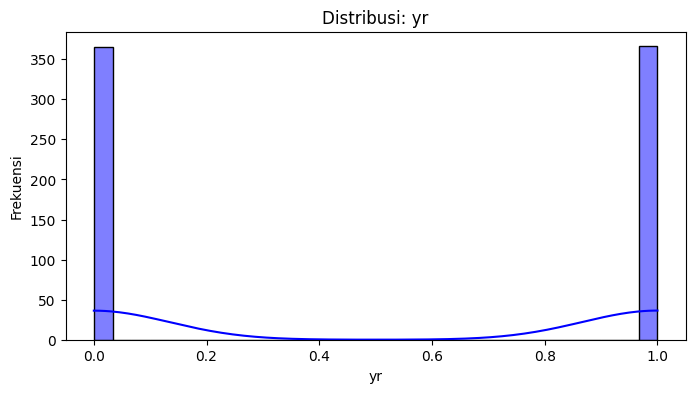

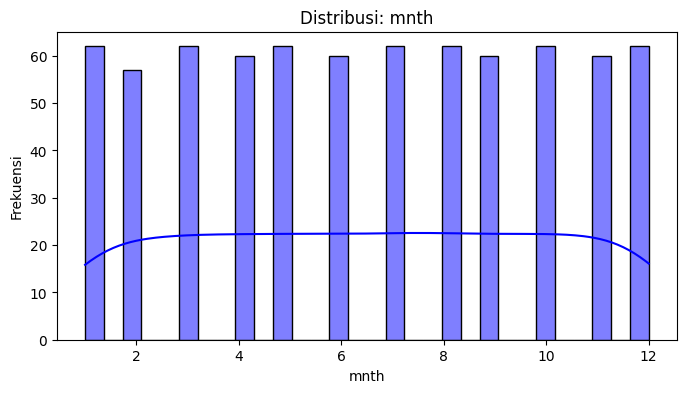

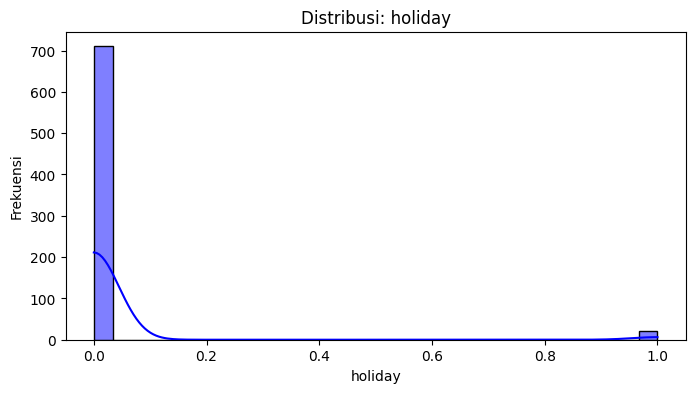

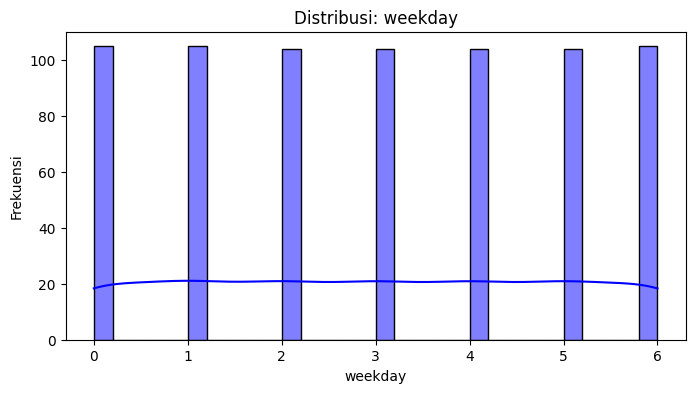

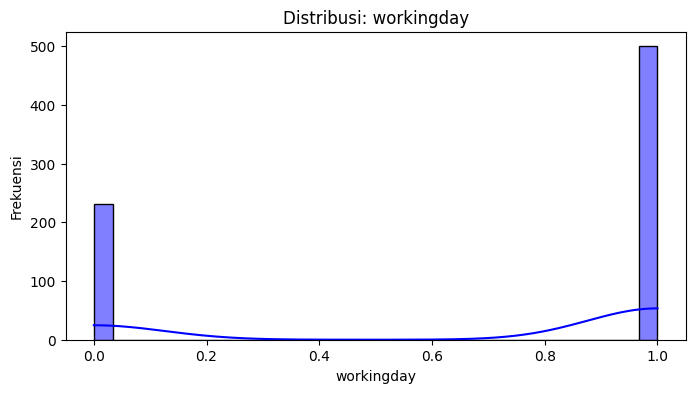

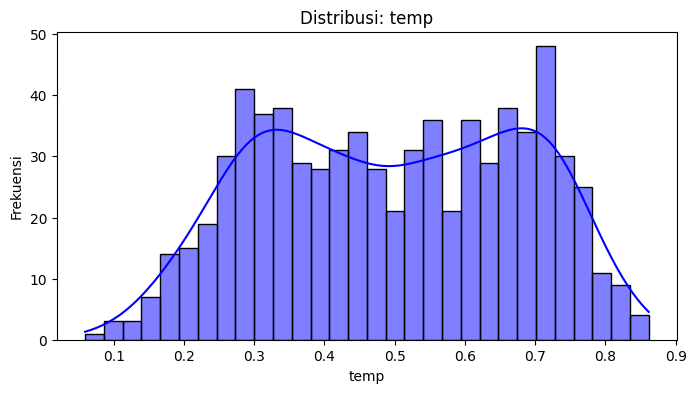

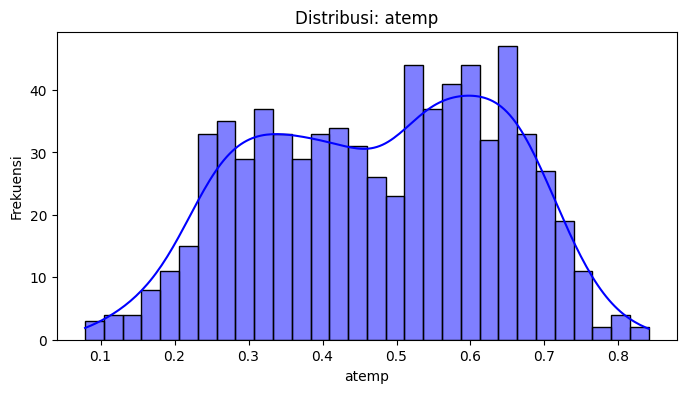

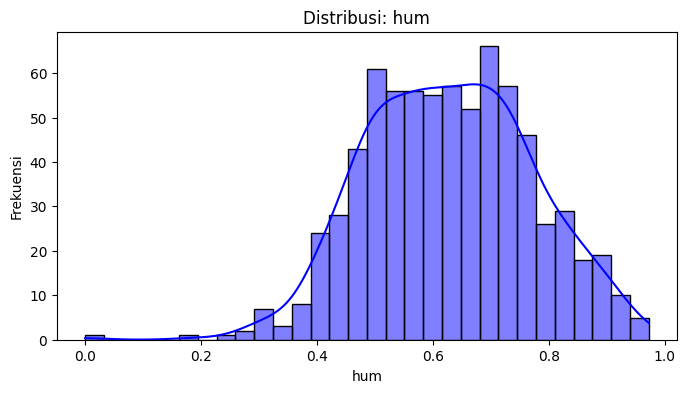

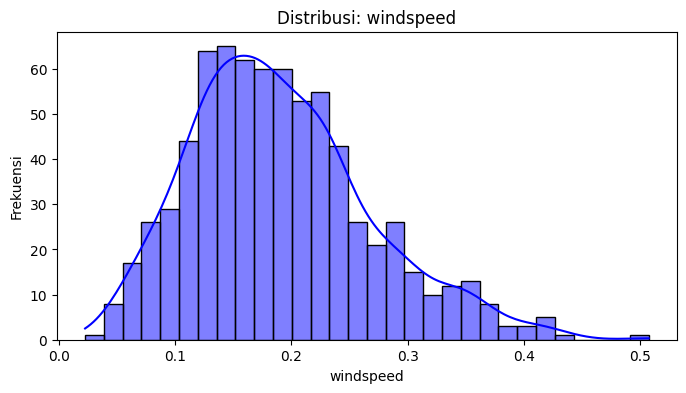

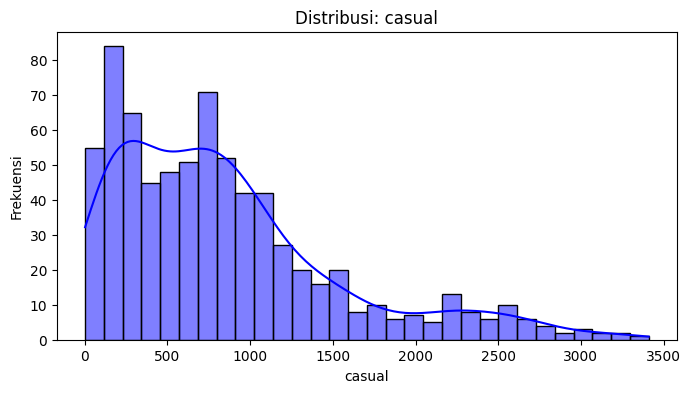

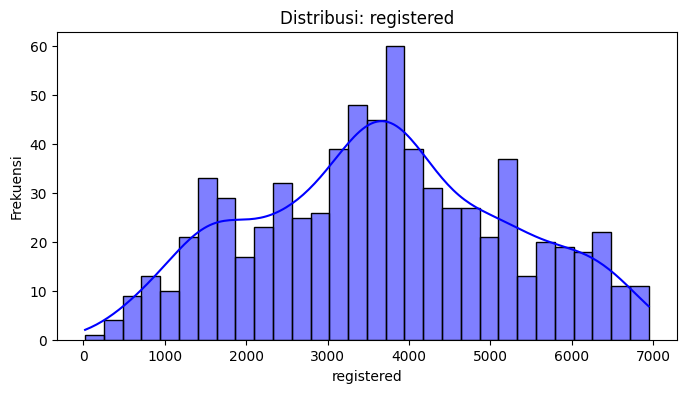

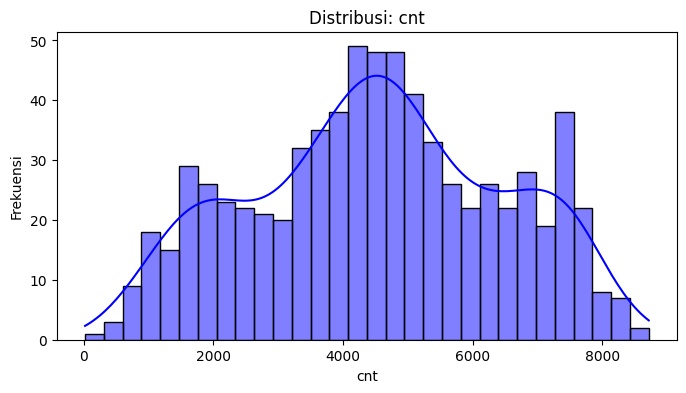

In [14]:
numerical_columns = rental_df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(rental_df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribusi: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

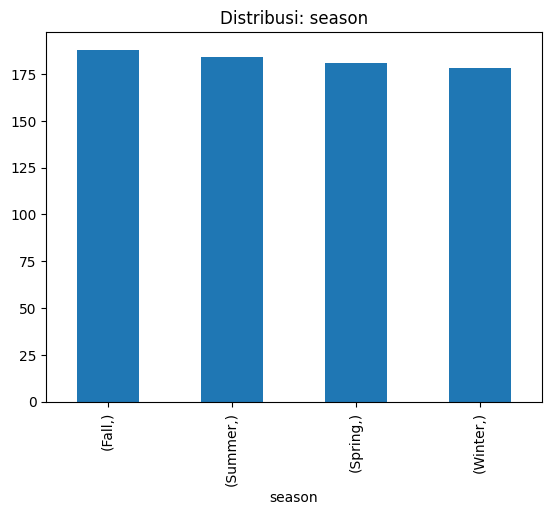

In [15]:
categorical_columns = ['season']
count = rental_df[categorical_columns].value_counts()
count.plot(kind='bar', title='Distribusi: season');

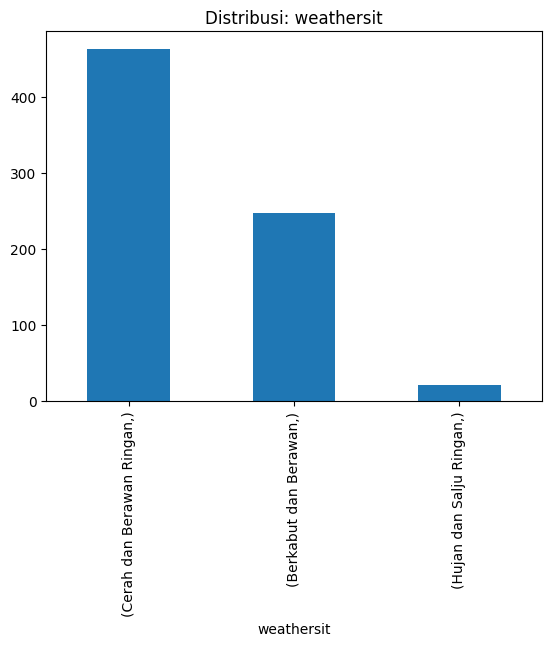

In [16]:
categorical_columns = ['weathersit']
count = rental_df[categorical_columns].value_counts()
count.plot(kind='bar', title='Distribusi: weathersit');

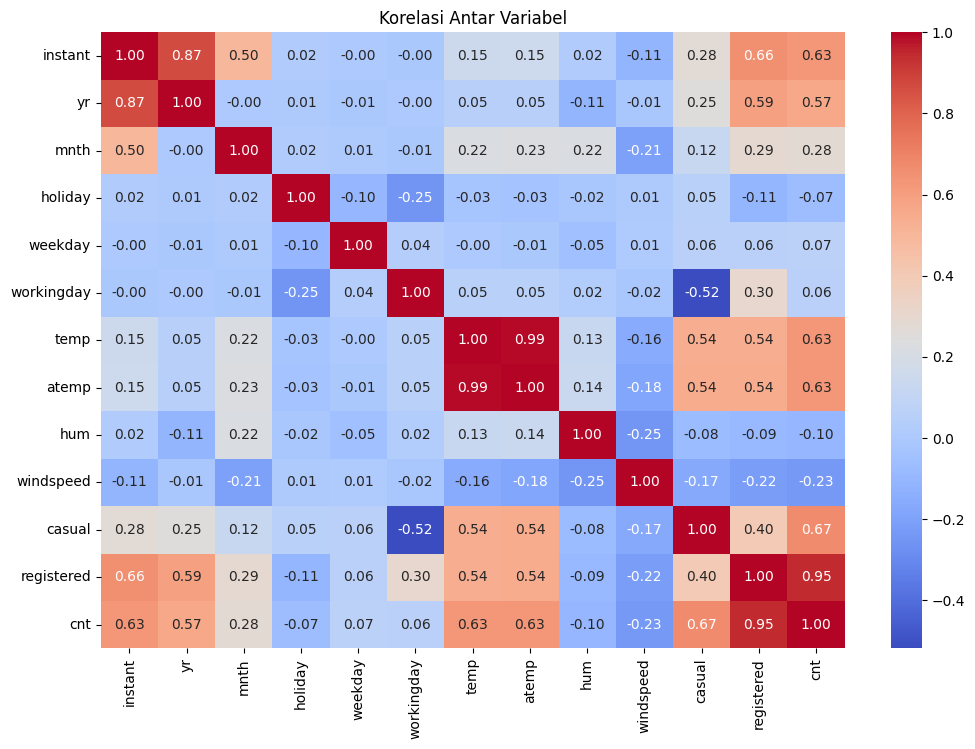

In [17]:
numeric_df = rental_df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

**Insight:**

- Atribut ```instant``` tampaknya merupakan indeks rekaman yang diurutkan secara numerik. Distribusi menunjukkan pola yang hampir seragam (uniform distribution) dengan setiap interval memiliki jumlah data yang kurang lebih sama, sekitar 25. Pola ini menunjukkan bahwa tidak ada informasi spesifik yang dapat diekstraksi dari data ini sebagai variabel numerik, karena fungsinya hanya untuk mengidentifikasi rekaman dalam dataset.
- Distribusi variabel ```yr``` (tahun) menunjukkan data biner, di mana 0 mewakili tahun 2011 dan 1 mewakili tahun 2012. Kedua kategori memiliki frekuensi yang hampir sama, menunjukkan bahwa data didistribusikan secara merata di antara dua tahun ini. Distribusi yang seimbang memudahkan analisis tren antar tahun tanpa adanya bias waktu.
- Distribusi nilai ```mnth``` juga menunjukkan pola yang relatif merata di setiap bulan, dengan jumlah data hampir sama dari Januari hingga Desember. Sedikit penurunan terlihat di bulan Desember, tetapi secara keseluruhan, aktivitas ini tetap konsisten sepanjang tahun. Pola ini mencerminkan bahwa penggunaan layanan tidak terlalu dipengaruhi oleh musim, meskipun ada kemungkinan fluktuasi kecil pada akhir tahun yang dapat dikaitkan dengan faktor musiman atau liburan.
- Sebaran data ```holiday```menunjukkan bahwa mayoritas nilai bernilai 0 (bukan hari libur), dengan jumlah data lebih dari 700. Sementara itu, data untuk nilai 1 (hari libur) sangat sedikit, di bawah 50. Hal ini mengindikasikan bahwa dataset ini didominasi oleh data hari kerja atau hari yang tidak dianggap libur. Informasi ini bisa berguna untuk menganalisis pengaruh hari libur terhadap pola lainnya, seperti penggunaan sepeda.
- Distribusi nilai ```weekday``` menunjukkan pola yang merata di semua hari dalam seminggu, dengan jumlah data hampir sama di setiap hari. Grafik ini mengindikasikan bahwa aktivitas yang diukur tidak dipengaruhi secara signifikan oleh hari tertentu, baik hari kerja maupun akhir pekan. Namun, pola ini juga bisa menunjukkan konsistensi dalam penggunaan layanan sepanjang minggu tanpa adanya lonjakan khusus pada hari-hari tertentu.
- Distribusi ```workingday``` menunjukkan data biner yang sangat jelas, dengan dua kategori utama: hari kerja (1) dan bukan hari kerja (0). Frekuensi hari kerja jauh lebih tinggi dibandingkan hari bukan kerja, mencerminkan bahwa data cenderung lebih sering direkam pada hari kerja. Hal ini mengindikasikan potensi fokus pada aktivitas selama hari kerja dibandingkan akhir pekan atau hari libur.
- Distribusi nilai ```temp``` menunjukkan pola yang mendekati simetris, dengan puncak distribusi pada rentang suhu normalisasi 0.6 hingga 0.7. Sebagian besar nilai berkisar antara 0.2 hingga 0.8, sedangkan suhu ekstrem, baik rendah (di bawah 0.2) maupun tinggi (di atas 0.8), jarang terjadi. Pola ini mengindikasikan bahwa aktivitas terkait data ini lebih sering terjadi pada suhu yang nyaman, mencerminkan ketergantungan pada kondisi lingkungan yang mendukung.
- Data distribusi ```atemp```menunjukkan pola bimodal, dengan dua puncak utama pada rentang 0.35–0.45 (13°C–19°C) dan 0.6–0.7 (29°C–34°C). Hal ini menunjukkan bahwa suhu yang dirasakan nyaman cenderung terjadi di musim semi, gugur, atau musim panas, yang menjadi kondisi ideal untuk aktivitas luar ruangan seperti bersepeda. Sebaliknya, suhu ekstrem di bawah 0.3 (dingin) jarang terjadi, kemungkinan mencerminkan musim dingin yang kurang diminati untuk bersepeda.
- Grafik menunjukkan bahwa ```hum``` memiliki pola distribusi menyerupai distribusi normal (bell-shaped curve). Sebagian besar data terpusat pada kelembapan sekitar 0.6, dengan frekuensi puncak mencapai lebih dari 60. Kelembapan rendah (di bawah 0.4) dan tinggi (di atas 0.8) relatif jarang terjadi. Hal ini menunjukkan bahwa kondisi kelembapan di lokasi yang dianalisis cenderung stabil dan berada di rentang menengah. Distribusi ini dapat digunakan untuk memprediksi tingkat kelembapan rata-rata di waktu tertentu.
- Distribusi ```windspeed``` berbentuk right-skewed (positively skewed). Sebagian besar nilai berkisar antara 0,1 hingga 0,3, dengan puncak tertinggi di sekitar 0,2. Frekuensi menurun secara bertahap setelah angka 0,3, dan hampir tidak ada nilai yang lebih besar dari 0,5. Pola ini menunjukkan bahwa sebagian besar kondisi cuaca melibatkan kecepatan angin yang rendah hingga sedang, dengan sedikit kejadian angin yang sangat kencang.
- Distribusi jumlah ```casual``` bersifat skewed ke kanan (positively skewed). Sebagian besar nilai berada di angka rendah, yaitu antara 0 hingga 500, dengan puncak tertinggi di sekitar 100-200. Frekuensi mulai menurun secara signifikan di atas 1000 dan hampir tidak ada pengguna kasual yang melebihi angka 3000. Hal ini menunjukkan bahwa penggunaan sepeda oleh pengguna kasual biasanya dalam skala kecil, dan hanya sedikit kasus di mana penggunaan sepeda oleh pengguna kasual mencapai jumlah yang tinggi. Distribusi ini bisa membantu memahami pola perilaku pengguna kasual.
- Distribusi jumlah ```registered``` bersifat mendekati normal dengan puncak distribusi berada di sekitar angka 4000. Sebagian besar data berada di rentang 2000 hingga 5000, menunjukkan bahwa jumlah pengguna terdaftar yang menyewa sepeda paling sering berkisar pada nilai tersebut. Frekuensi menurun signifikan di bawah 1000 dan di atas 6000, dengan nilai ekstrem jarang terjadi. Pola ini menunjukkan bahwa pengguna terdaftar biasanya menyewa sepeda dalam jumlah moderat hingga tinggi, mencerminkan peran mereka yang konsisten dalam penggunaan layanan sepeda.
- Data distribusi ```cnt``` menunjukkan jumlah penyewaan sepeda yang mendekati normal, dengan jumlah tertinggi berkisar pada 4000–5000 penyewaan. Hal ini mencerminkan permintaan yang stabil pada suhu sedang hingga hangat dan cuaca yang mendukung. Nilai ekstrem pada jumlah sewa rendah (<2000) kemungkinan besar terjadi pada cuaca buruk, musim dingin, atau hari kerja biasa. Sebaliknya, nilai sewa yang sangat tinggi (>7000) mungkin terjadi pada akhir pekan, hari libur, atau musim panas, yang menjadi puncak aktivitas pengguna sepeda.
- Sebagian besar hari memiliki kondisi cuaca "Cerah dan Berawan Ringan," yang mendominasi lebih dari separuh total observasi. Kondisi "Berkabut dan Berawan" juga cukup sering terjadi, meskipun dalam jumlah yang lebih kecil. Sementara itu, cuaca "Hujan dan Salju Ringan" sangat jarang, menunjukkan bahwa kondisi cuaca ekstrem jarang tercatat dalam dataset ini. Pola ini dapat membantu memahami bagaimana cuaca memengaruhi aktivitas atau penggunaan sepeda.
- Data menunjukkan distribusi musim yang hampir merata dengan jumlah observasi serupa untuk setiap musim (Fall, Summer, Spring, dan Winter). Hal ini menunjukkan bahwa data pengamatan diambil secara konsisten sepanjang tahun, tanpa bias terhadap musim tertentu. Sebaran yang seragam ini memberikan representasi yang seimbang dalam analisis berdasarkan musim.
- Korelasi menunjukkan hubungan kuat antara variabel ```cnt``` (jumlah total peminjaman) dengan ```registered``` (0,95) dan ```casual``` (0,67), menegaskan bahwa kedua kategori pengguna tersebut berkontribusi besar terhadap total jumlah peminjaman. Variabel suhu (```temp``` dan ```atemp```) juga menunjukkan korelasi positif sedang dengan ```cnt``` (0,63), menunjukkan bahwa penggunaan sepeda meningkat seiring dengan suhu yang lebih hangat. Sebaliknya, kecepatan angin ```windspeed``` memiliki korelasi negatif dengan ```cnt``` (-0,23), menunjukkan bahwa angin kencang cenderung mengurangi penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana cuaca mempengaruhi rental sepeda?

<ipython-input-18-ae92b5299f1a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit', y='cnt', data=rental_df, palette='pastel')


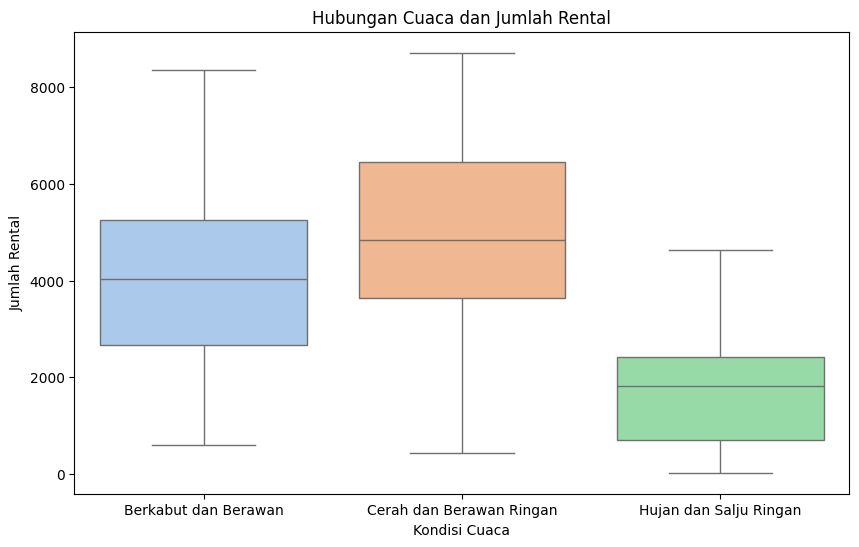

In [18]:
result = rental_df.groupby(by="weathersit").instant.nunique().sort_index().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='weathersit', y='cnt', data=rental_df, palette='pastel')
plt.title("Hubungan Cuaca dan Jumlah Rental")
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Rental')
plt.xticks(result.index)
plt.show()

### Pertanyaan 2: Bagaimana musim mempengaruhi rental sepeda?

<ipython-input-19-2befecb370a2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='cnt', data=rental_df, palette='pastel')


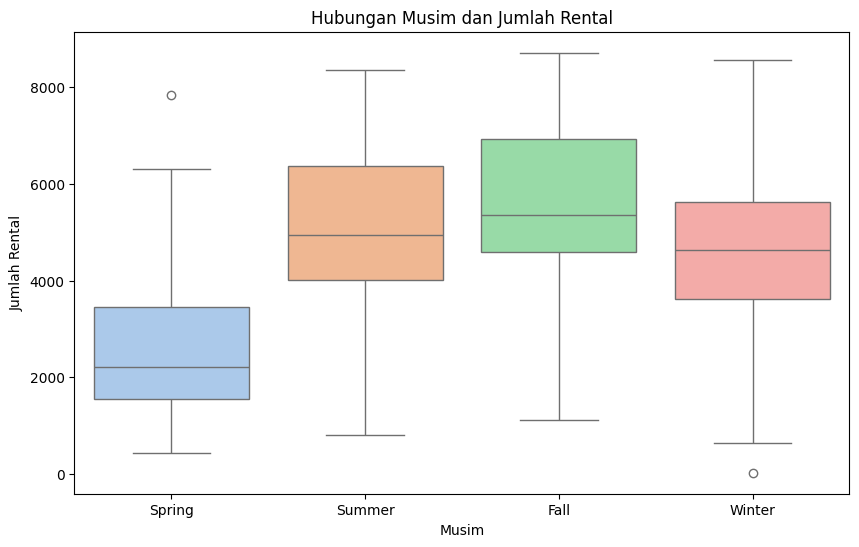

In [19]:
result = rental_df.groupby(by="season").instant.nunique().sort_index().reset_index()

plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=rental_df, palette='pastel')
plt.title("Hubungan Musim dan Jumlah Rental")
plt.xlabel('Musim')
plt.ylabel('Jumlah Rental')
plt.xticks(result.index)
plt.show()

### Pertanyaan 3: Apakah jumlah peminjam sepeda meningkat dari tahun 2011 ke 2012?

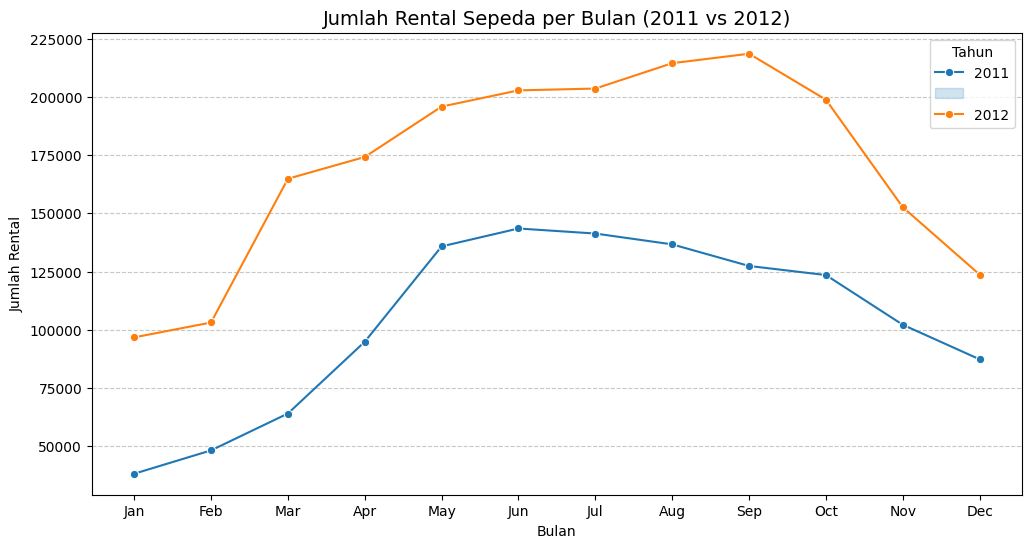

In [20]:
monthly_rentals = rental_df.groupby(['yr', 'mnth'])['cnt'].sum().reset_index()

monthly_rentals['month_label'] = monthly_rentals['mnth'].apply(
    lambda x: ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'][x - 1]
)

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_label', y='cnt', hue='yr', data=monthly_rentals, marker='o')
plt.title('Jumlah Rental Sepeda per Bulan (2011 vs 2012)', fontsize=14)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Rental')
plt.legend(title='Tahun', labels=['2011', '', '2012'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Conclusion

- Pengaruh Cuaca terhadap Rental Sepeda
Cuaca sangat memengaruhi jumlah penyewaan sepeda. Cuaca cerah dan berawan ringan mencatat jumlah rental tertinggi, menunjukkan bahwa kondisi yang nyaman meningkatkan minat masyarakat untuk bersepeda. Sebaliknya, kondisi berkabut dan berawan memiliki jumlah rental yang sedang, sedangkan hujan dan salju ringan mencatat jumlah rental terendah. Hal ini mengindikasikan bahwa cuaca buruk seperti hujan atau salju secara signifikan mengurangi minat pengguna untuk menyewa sepeda.

- Pengaruh Musim terhadap Rental Sepeda
Jumlah penyewaan sepeda bervariasi berdasarkan musim. Musim panas mencatat jumlah rental tertinggi karena cuaca yang hangat dan mendukung aktivitas luar ruangan, diikuti oleh musim gugur yang masih cukup nyaman untuk bersepeda. Sebaliknya, musim dingin dan musim semi memiliki jumlah rental lebih rendah, kemungkinan karena suhu dingin atau cuaca yang kurang stabil. Secara keseluruhan, aktivitas penyewaan sepeda lebih populer di musim dengan cuaca yang nyaman.

- Perbandingan Rental Sepeda Tahun 2011 dan 2012
Jumlah penyewaan sepeda secara keseluruhan meningkat dari tahun 2011 ke 2012. Peningkatan signifikan terlihat khususnya pada bulan Februari hingga Juni di tahun 2012, yang menunjukkan minat yang semakin tinggi terhadap layanan rental sepeda. Tren musiman juga tetap terlihat pada kedua tahun, dengan puncak rental terjadi pada musim panas dan penurunan pada musim dingin. Peningkatan ini dapat disebabkan oleh berbagai faktor, seperti promosi layanan, penambahan fasilitas, atau meningkatnya kesadaran akan transportasi ramah lingkungan.